In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import json
import argparse
import torch
from tqdm import tqdm
import data_loader.data_loaders as module_data
import model.loss as module_loss
import model.metric as module_metric
import model.model as module_arch
from trainer import Trainer
from utils import Logger

In [4]:
#This function gets the parameters from the config.json file 
def get_instance(module, name, config, *args):
    return getattr(module, config[name]['type'])(*args, **config[name]['args'])

def main(config, resume):
    train_logger = Logger() #uses entries to store training performance metrics

    # setup data_loader instances
    data_loader = get_instance(module_data, 'data_loader', config) #looks in data_loader/data_loaders.py for 'MNISTDataLoader'
    valid_data_loader = data_loader.split_validation() #allocate some images as validation

    # build model architecture
    model = get_instance(module_arch, 'arch', config) #looks in the model/model.py for 'MnistModel', as specified by config
    print(model)
    print(torch.cuda.get_device_name(0))

    # get function handles of loss and metrics
    loss = getattr(module_loss, config['loss']) #looks in model/loss.py for 'nll_loss'
    metrics = [getattr(module_metric, met) for met in config['metrics']] #get all the metrics in model/metrics.py - default is accuracy and top 3 accuracy

    # build optimizer, learning rate scheduler. delete every lines containing lr_scheduler for disabling scheduler
    trainable_params = filter(lambda p: p.requires_grad, model.parameters()) #Number of training params
    optimizer = get_instance(torch.optim, 'optimizer', config, trainable_params)
    lr_scheduler = get_instance(torch.optim.lr_scheduler, 'lr_scheduler', config, optimizer)

    trainer = Trainer(model, loss, metrics, optimizer,
                      resume=resume, #choose a previous epoch to start training from
                      config=config,
                      data_loader=data_loader,
                      valid_data_loader=valid_data_loader,
                      lr_scheduler=lr_scheduler,
                      train_logger=train_logger)

    trainer.train()



In [11]:
config_file = 'config.json'
# load config file
with open(config_file) as handle:
    config = json.load(handle)
# setting path to save trained models and log files
path = os.path.join(config['trainer']['save_dir'], config['name'])

In [12]:
#Train the network
main(config, None)

MnistModel(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)
Trainable parameters: 21840


Train Epoch: 1 [0/54000 (0%)] Loss: 2.308060
Train Epoch: 1 [1408/54000 (3%)] Loss: 2.230936
Train Epoch: 1 [2816/54000 (5%)] Loss: 2.034446
Train Epoch: 1 [4224/54000 (8%)] Loss: 1.682630
Train Epoch: 1 [5632/54000 (10%)] Loss: 1.279940
Train Epoch: 1 [7040/54000 (13%)] Loss: 1.150876
Train Epoch: 1 [8448/54000 (16%)] Loss: 0.933038
Train Epoch: 1 [9856/54000 (18%)] Loss: 0.658498
Train Epoch: 1 [11264/54000 (21%)] Loss: 0.630270
Train Epoch: 1 [12672/54000 (23%)] Loss: 0.689489
Train Epoch: 1 [14080/54000 (26%)] Loss: 0.701856
Train Epoch: 1 [15488/54000 (29%)] Loss: 0.636871
Train Epoch: 1 [16896/54000 (31%)] Loss: 0.671162
Train Epoch: 1 [18304/54000 (34%)] Loss: 0.748563
Train Epoch: 1 [19712/54000 (36%)] Loss: 0.578480
Train Epoch: 1 [21120/54000 (39%)] Loss: 0.631065
Train Epoch: 1 [22528/54000 (42%)] Loss: 0.490486
Train Epoch: 1 [23936/54000 (44%)] Loss: 0.392174
Train Epoch: 1 [25344/54000 (47%)] Loss: 0.374846
Train Epoch: 1 [26752/54000 (50%)] Loss: 0.369213
Train Epoch: 1 

Train Epoch: 4 [36608/54000 (68%)] Loss: 0.227132
Train Epoch: 4 [38016/54000 (70%)] Loss: 0.188084
Train Epoch: 4 [39424/54000 (73%)] Loss: 0.106945
Train Epoch: 4 [40832/54000 (76%)] Loss: 0.192848
Train Epoch: 4 [42240/54000 (78%)] Loss: 0.276577
Train Epoch: 4 [43648/54000 (81%)] Loss: 0.198926
Train Epoch: 4 [45056/54000 (83%)] Loss: 0.192840
Train Epoch: 4 [46464/54000 (86%)] Loss: 0.231142
Train Epoch: 4 [47872/54000 (89%)] Loss: 0.212083
Train Epoch: 4 [49280/54000 (91%)] Loss: 0.253949
Train Epoch: 4 [50688/54000 (94%)] Loss: 0.173965
Train Epoch: 4 [52096/54000 (96%)] Loss: 0.353570
Train Epoch: 4 [53504/54000 (99%)] Loss: 0.177755
    val_my_metric2 : 0.9984802431610943
    my_metric2     : 0.9902806575829384
    my_metric      : 0.9366007955314828
    val_loss       : 0.06459798743116095
    val_my_metric  : 0.9800294452887538
    loss           : 0.21580420568656017
    epoch          : 4
Saving checkpoint: saved/Mnist_LeNet/0414_203632/checkpoint-epoch4.pth ...
Saving cur

Train Epoch: 8 [7040/54000 (13%)] Loss: 0.187481
Train Epoch: 8 [8448/54000 (16%)] Loss: 0.066302
Train Epoch: 8 [9856/54000 (18%)] Loss: 0.198886
Train Epoch: 8 [11264/54000 (21%)] Loss: 0.159810
Train Epoch: 8 [12672/54000 (23%)] Loss: 0.144509
Train Epoch: 8 [14080/54000 (26%)] Loss: 0.150703
Train Epoch: 8 [15488/54000 (29%)] Loss: 0.224083
Train Epoch: 8 [16896/54000 (31%)] Loss: 0.178481
Train Epoch: 8 [18304/54000 (34%)] Loss: 0.200104
Train Epoch: 8 [19712/54000 (36%)] Loss: 0.159400
Train Epoch: 8 [21120/54000 (39%)] Loss: 0.134180
Train Epoch: 8 [22528/54000 (42%)] Loss: 0.063308
Train Epoch: 8 [23936/54000 (44%)] Loss: 0.113061
Train Epoch: 8 [25344/54000 (47%)] Loss: 0.323972
Train Epoch: 8 [26752/54000 (50%)] Loss: 0.211435
Train Epoch: 8 [28160/54000 (52%)] Loss: 0.242715
Train Epoch: 8 [29568/54000 (55%)] Loss: 0.223938
Train Epoch: 8 [30976/54000 (57%)] Loss: 0.317470
Train Epoch: 8 [32384/54000 (60%)] Loss: 0.147760
Train Epoch: 8 [33792/54000 (63%)] Loss: 0.157816
Tra

Train Epoch: 11 [43648/54000 (81%)] Loss: 0.144551
Train Epoch: 11 [45056/54000 (83%)] Loss: 0.112160
Train Epoch: 11 [46464/54000 (86%)] Loss: 0.100621
Train Epoch: 11 [47872/54000 (89%)] Loss: 0.150950
Train Epoch: 11 [49280/54000 (91%)] Loss: 0.101710
Train Epoch: 11 [50688/54000 (94%)] Loss: 0.231430
Train Epoch: 11 [52096/54000 (96%)] Loss: 0.195713
Train Epoch: 11 [53504/54000 (99%)] Loss: 0.201939
    val_my_metric2 : 0.9996675531914894
    my_metric2     : 0.9943879062288423
    my_metric      : 0.955521115436696
    val_loss       : 0.04063850627379849
    val_my_metric  : 0.987533244680851
    loss           : 0.14877195366750962
    epoch          : 11
Saving checkpoint: saved/Mnist_LeNet/0414_203632/checkpoint-epoch11.pth ...
Saving current best: model_best.pth ...
Train Epoch: 12 [0/54000 (0%)] Loss: 0.170723
Train Epoch: 12 [1408/54000 (3%)] Loss: 0.097972
Train Epoch: 12 [2816/54000 (5%)] Loss: 0.195444
Train Epoch: 12 [4224/54000 (8%)] Loss: 0.102015
Train Epoch: 12 [56

KeyboardInterrupt: 

In [124]:
def main2(config, resume):
    # setup data_loader instances
    data_loader = getattr(module_data, config['data_loader']['type'])(
        config['data_loader']['args']['data_dir'],
        batch_size=512,
        shuffle=False,
        validation_split=0.0,
        training=False,
        num_workers=2
    )
    
    # build model architecture
    model = get_instance(module_arch, 'arch', config)
    print(model)
    print(torch.cuda.get_device_name(0))


    
    # get function handles of loss and metrics
    loss_fn = getattr(module_loss, config['loss'])
    metric_fns = [getattr(module_metric, met) for met in config['metrics']]
    
    # load state dict
    checkpoint = torch.load(resume)
    state_dict = checkpoint['state_dict'] #dictionary of model parameters from saved file
    if config['n_gpu'] > 1:
        model = torch.nn.DataParallel(model)
    model.load_state_dict(state_dict) 
    
    # prepare model for testing
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    model.eval() #tells model to ignore dropout and batch normalization
    
    total_loss = 0.0
    total_metrics = torch.zeros(len(metric_fns))
    
    with torch.no_grad(): #speed up calculations, unable to perform back propogation
        for i, (data, target) in enumerate(tqdm(data_loader)): #tqdm is a progress bar
            data, target = data.to(device), target.to(device)
            output = model(data)
            #
            # save sample images, or do something with output here
            #
            
            
            if i < 5:
                fig = plt.figure()
                output_cpu = output.to(torch.device("cpu"))
                plt.title("Prediction = " + str(np.argmax(output_cpu[1], axis=0)))
                data_cpu = data.to(torch.device("cpu"))
                plt.imshow(data_cpu[1].view([28,28]))
                
            # computing loss, metrics on test set
            loss = loss_fn(output, target)
            batch_size = data.shape[0]
            total_loss += loss.item() * batch_size
            for i, metric in enumerate(metric_fns):
                total_metrics[i] += metric(output, target) * batch_size
        
        plt.show()
                      
    n_samples = len(data_loader.sampler)
    print("num samples = " + str(n_samples))
    log = {'loss': total_loss / n_samples}
    log.update({met.__name__: total_metrics[i].item() / n_samples for i, met in enumerate(metric_fns)})
    print(log)
    print("My_metric is accuracy, my_metric2 is top-3 accuracy")

In [125]:
resume = "saved/Mnist_LeNet/0414_203632/model_best.pth"

print(os.path.isdir("saved/Mnist_LeNet/0414_203632"))
print(os.path.exists(resume))

#config = torch.load("saved/Mnist_LeNet/0414_203632/config.json")
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

True
True


  0%|          | 0/20 [00:00<?, ?it/s]

MnistModel(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)
Trainable parameters: 21840
Tesla K80


100%|██████████| 20/20 [00:01<00:00, 18.09it/s]


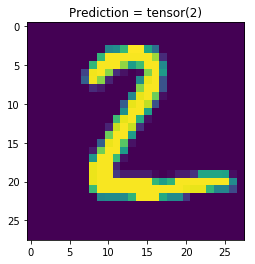

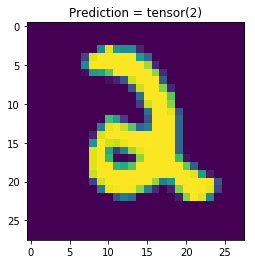

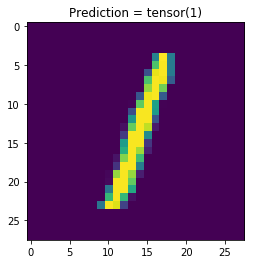

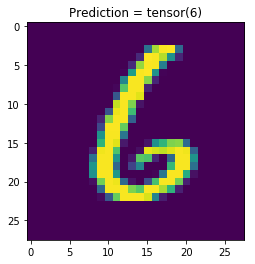

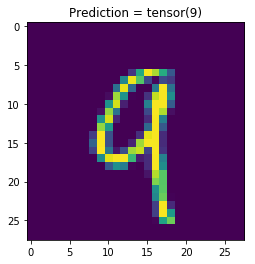

num samples = 10000
{'my_metric': 0.9867, 'loss': 0.04054535250663757, 'my_metric2': 0.9995}
My_metric is accuracy, my_metric2 is top-3 accuracy


In [126]:
#Test
main2(config, resume)